# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0383 Позолотин Константин и Смирнов Иван. Вариант №18.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
Дискретный сигнал

Дискретный сигнал представляется последовательностью значений $x_0, x_1, x_2, ..., x_{N-1}$ и получается путем дискретизации аналогового сигнала $s(t)$. Если отсчеты $x_k$ получены при равномерной дискретизации с шагом 1, то $x_k = s(t_k)$, где $t_k - t_{k-1} = T$ и $T = 1$. Если шаг дискретизации не равен 1, то вводится новая переменная $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}$, и результат записывается как $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$.

Спектр дискретного сигнала $S(\omega)$ вычисляется по формуле: 

$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$.

Дискретное преобразование Фурье:


$X(k) = \sum_{n=0}^{N-1} x(n) \cdot e^{-j \cdot \frac{2\pi}{N} \cdot k \cdot n}$

Обратное дискретное преобразование Фурье (ОДПФ):


$ x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \cdot e^{j \cdot \frac{2\pi}{N} \cdot k \cdot n} $


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

### Задание 1

Создание аналогового сигнала, который затем будет преобразован в цифровой путем дискретизации.:

$s(t) = \sum_{k} A_k \cdot \cos(\omega_k t + \varphi_k)$



In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 32, 1)

A_k = [random.randint(1, 11) for _ in range(11)]
omega_k = [i * 0.1 * math.pi for i in range(11)]
phi_k = [random.uniform(0, 0.5) for _ in range(11)]

def sign(t):
    return sum(A * math.cos(omega * t + phi) for A, omega, phi in zip(A_k, omega_k, phi_k)) / sum(A_k)

def an_sign():
    return [sign(t) for t in np.arange(0, 32, 0.1)]

def disc_sign():
    return [an_sign()[i * 10] for i in range(32)]


### Задание 2

Визуализация аналогового сигнала:

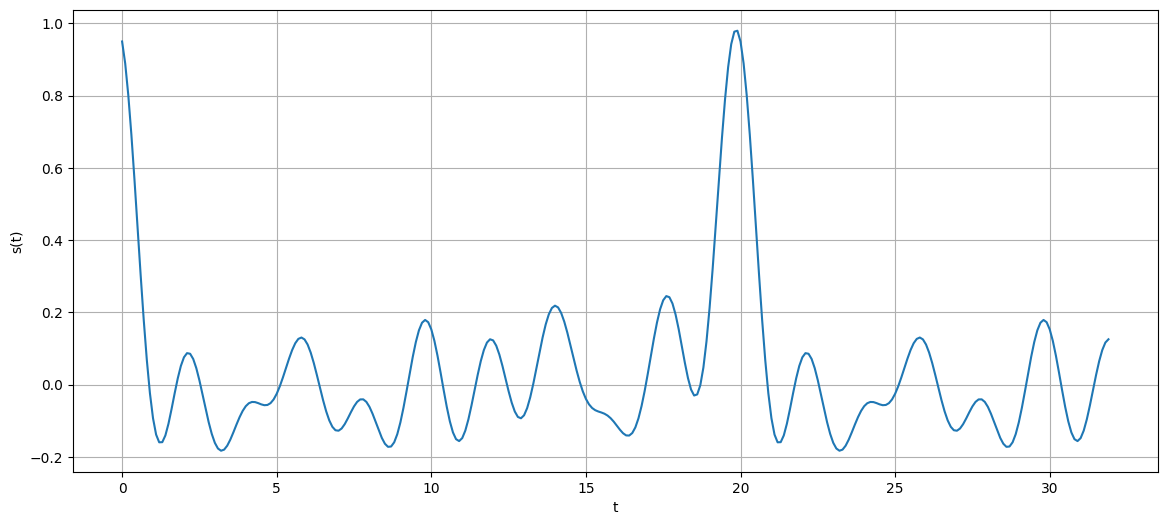

In [2]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, 32, 0.1), an_sign())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала:

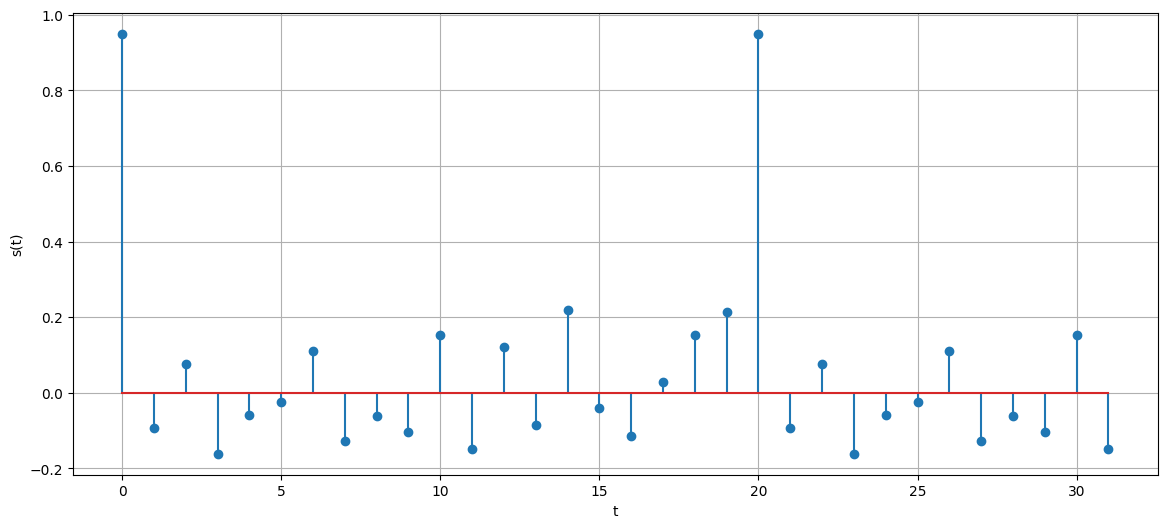

In [3]:
plt.figure(figsize=(14, 6))
plt.stem(n, disc_sign())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

### Задание 3.
С помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала.


$ S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k} $


Визуализация спектра дискретного сигнала:

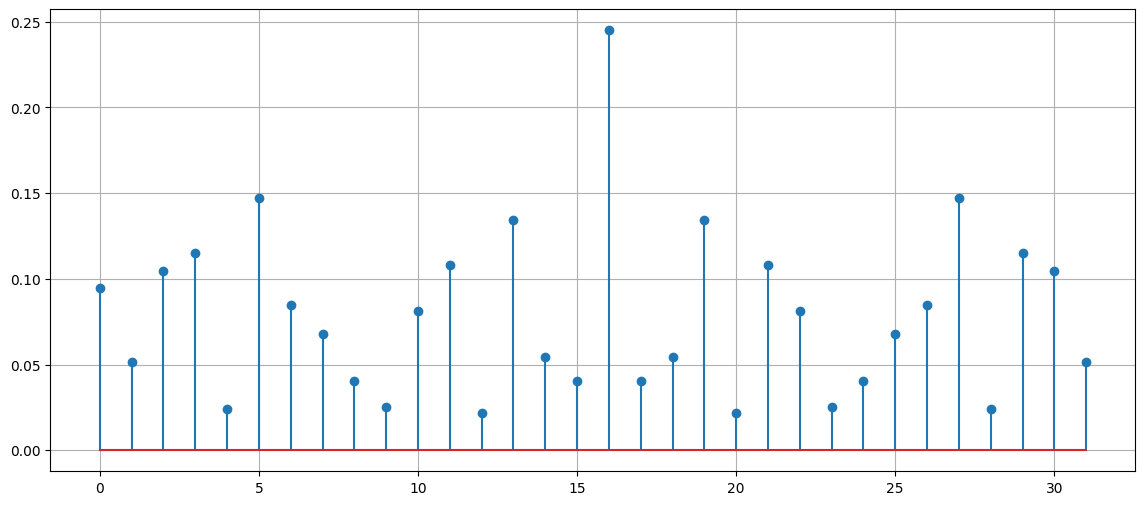

In [4]:
def f():
    return 2 * np.abs(np.fft.fft(disc_sign())) / 32

plt.figure(figsize=(14, 6))
plt.stem(f())
plt.grid(True)
plt.show()

### Задание 4.

Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам: 


Сглаживание по 5-ти точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

Передаточная функция:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

Сглаживание по 9-ти точкам:

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$

Передаточная функция:

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

In [5]:
def sgl(s):
    return np.convolve(s, np.ones(5)/5, 'same')

def sgl_n(s):
    return np.convolve(s, np.ones(9)/9, 'same')


### Задание 5.

Визуализация дискретного сигнала.

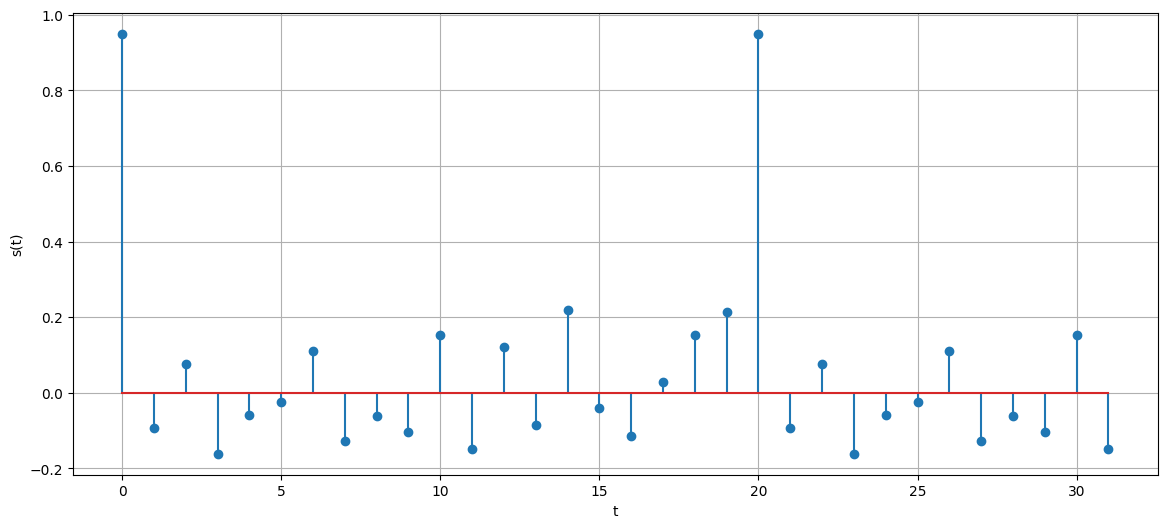

In [6]:
signal_5 = sgl(disc_sign())
signal_9 = sgl_n(disc_sign())

plt.figure(figsize=(14, 6))
plt.stem(n, disc_sign())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала после линейного сглаживания по 5-и точкам:

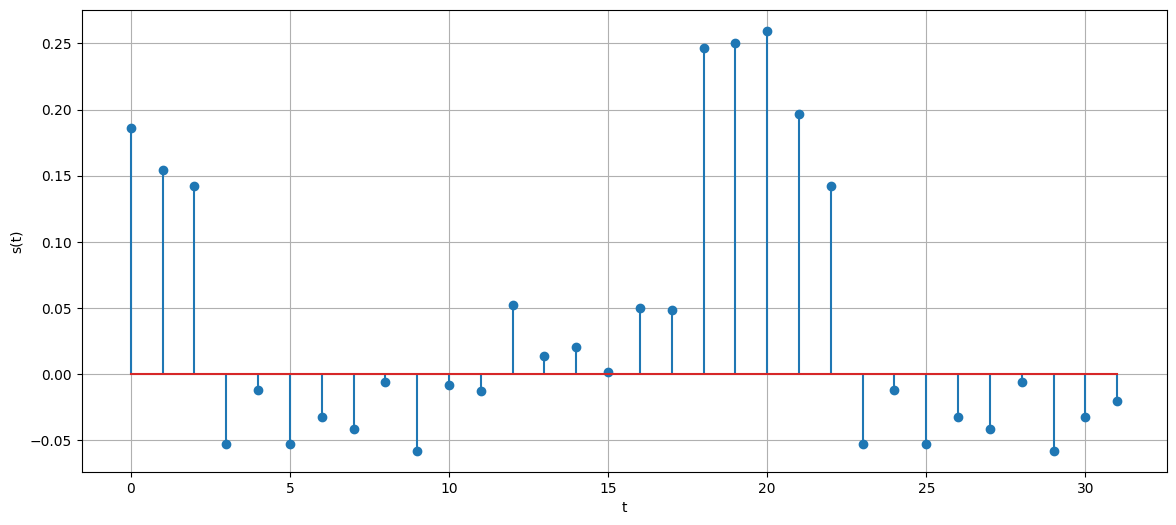

In [7]:
plt.figure(figsize=(14, 6))
plt.stem(signal_5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала после линейного сглаживания по 9-и точкам:

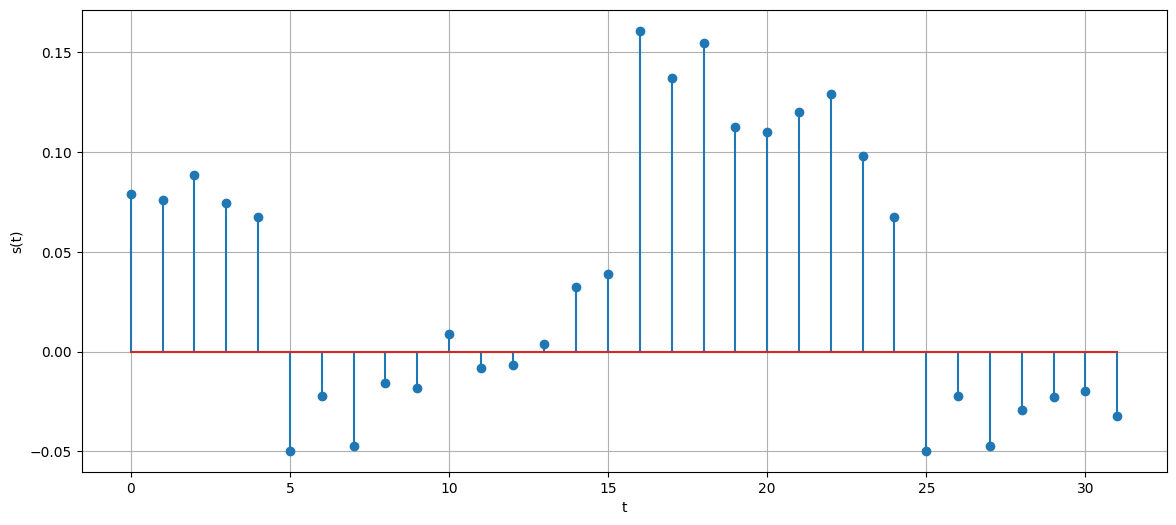

In [8]:
plt.figure(figsize=(14, 6))
plt.stem(signal_9)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

### Задание 6.

Используя дискретное преобразование Фурье (ДПФ), были вычислены спектры дискретных сигналов после прохождения через фильтрацию:

In [9]:
con_5 = 2 * np.abs(np.fft.fft(signal_5)) / len(np.fft.fft(signal_5))
con_9 = 2 * np.abs(np.fft.fft(signal_9)) / len(np.fft.fft(signal_9))

Визуализация спектра дискретного сигнала:

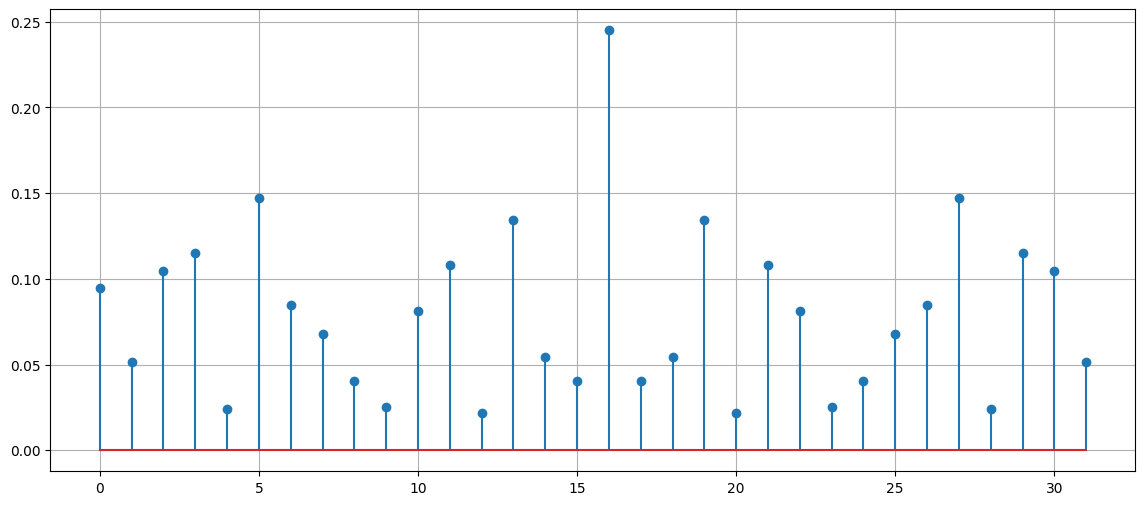

In [10]:
plt.figure(figsize=(14, 6))
plt.stem(f())
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала после линейного сглаживания по 5-и точкам:

c:\Users\repoz\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\repoz\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


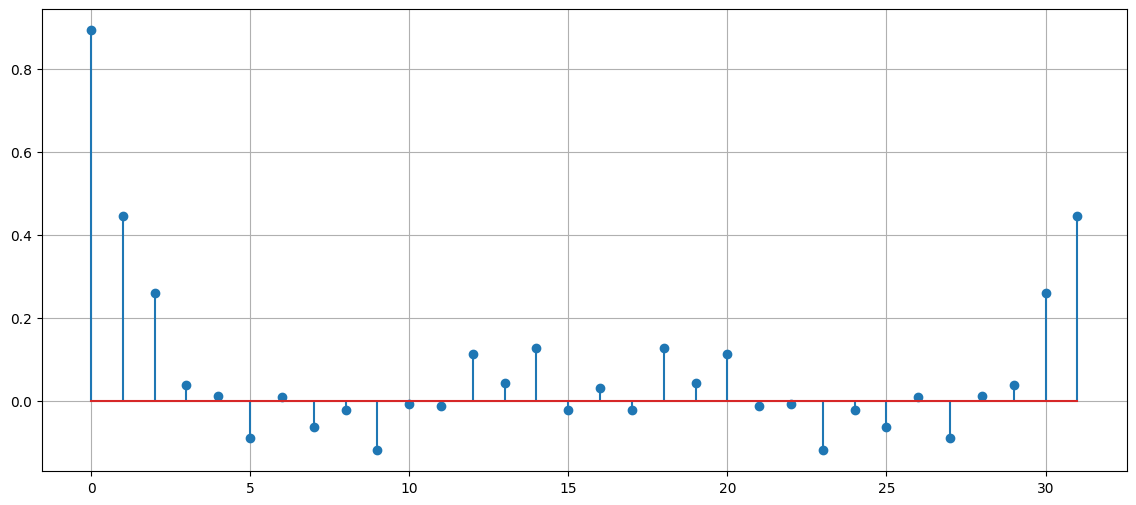

In [11]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_5))
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала после линейного сглаживания по 9-и точкам:

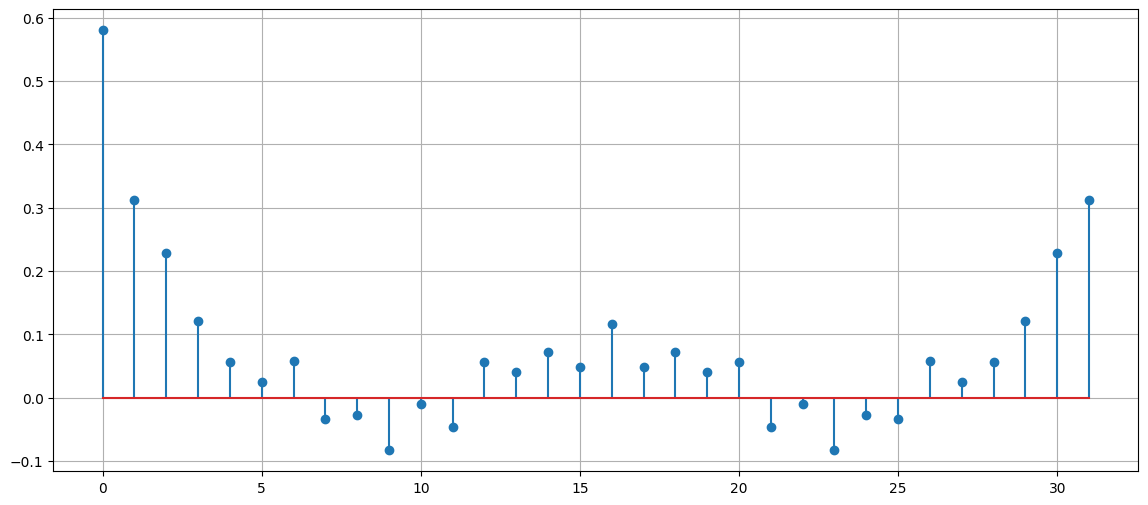

In [12]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_9))
plt.grid(True)
plt.show()

### Задание 7.
 
Из графиков видно, что изменения значений дискретных отсчетов спектра соответствуют значениям передаточных функций:

- В области нулевой частоты присутствует полоса пропускания, поскольку сигнал является переменной величиной, и даже в полосе пропускания амплитудное падение не достигает нулевого значения.

- С увеличением количества точек уменьшается ширина полосы пропускания, а подавление высоких частот увеличивается.


### Задание 8.



#### Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

Cглаживание полиномом второй степени по 5 узлам:

$y_5(n) = \frac1{35}(-3x_{k-2} + 12x_{k-1} + 17x_k +12x_{k+1} - 3x_{k+2})$

Формула для передаточной функции (частотной характеристики) фильтра:

$H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$

Cглаживание полиномом второй степени по 9 узлам:

$y_9(n) = \frac1{231}(-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4})$

Формула для передаточной функции (частотной характеристики) фильтра:

$H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$

In [13]:
def sgl(s):
    return np.convolve(s, np.array([-3, 12, 17, 12, -3]) / 35, 'same')

def sgl_n(s):
    return np.convolve(s, np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231, 'same')

Визуализация дискретного сигнала:

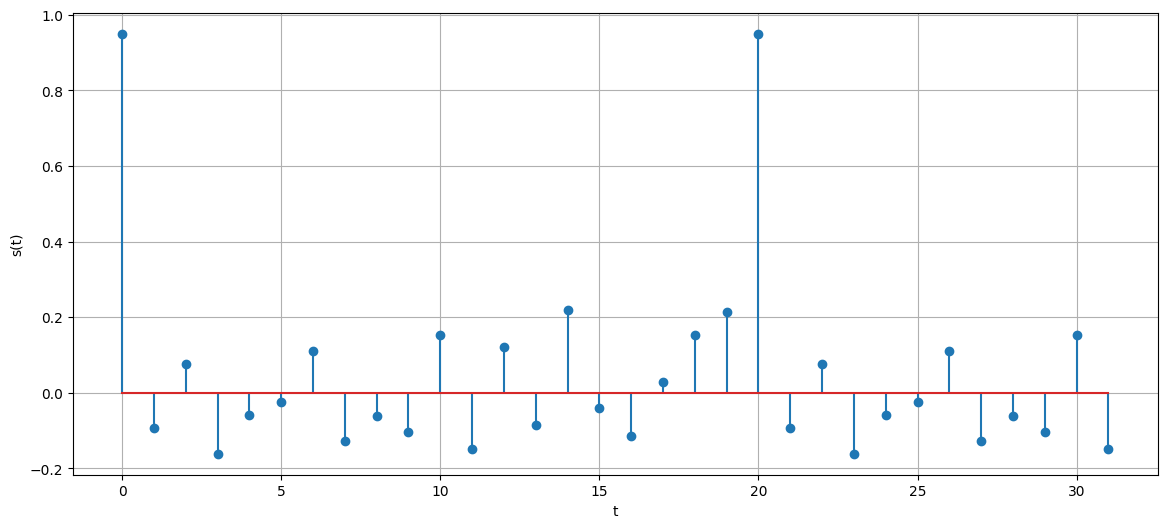

In [14]:
signal_5 = sgl(disc_sign())
signal_9 = sgl_n(disc_sign())

plt.figure(figsize=(14, 6))
plt.stem(n, disc_sign())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала после сглаживания полиномом второй степени по 5-и точкам:

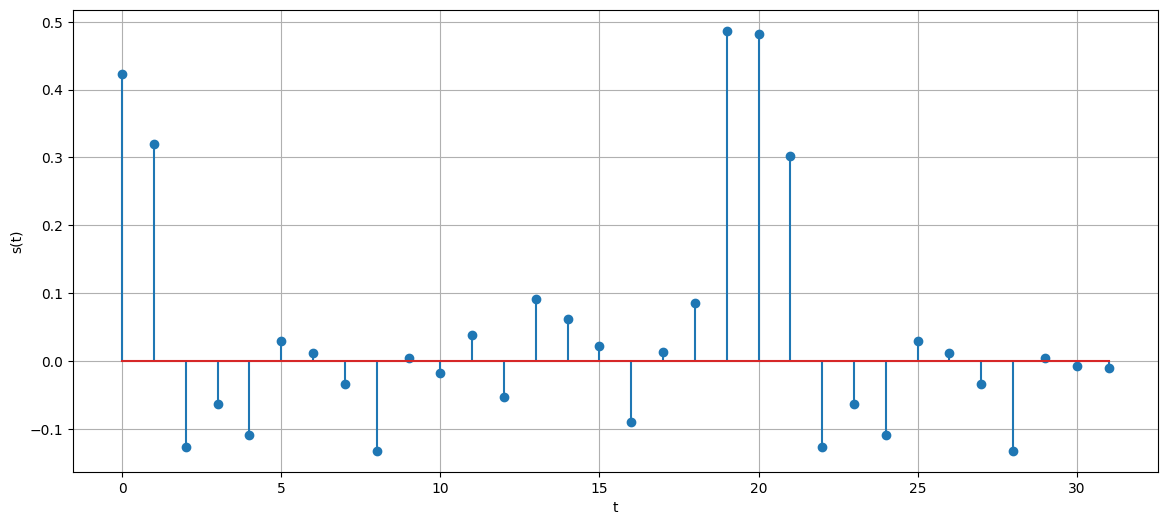

In [15]:
plt.figure(figsize=(14, 6))
plt.stem(signal_5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала после сглаживания полиномом второй степени по 9-и точкам:

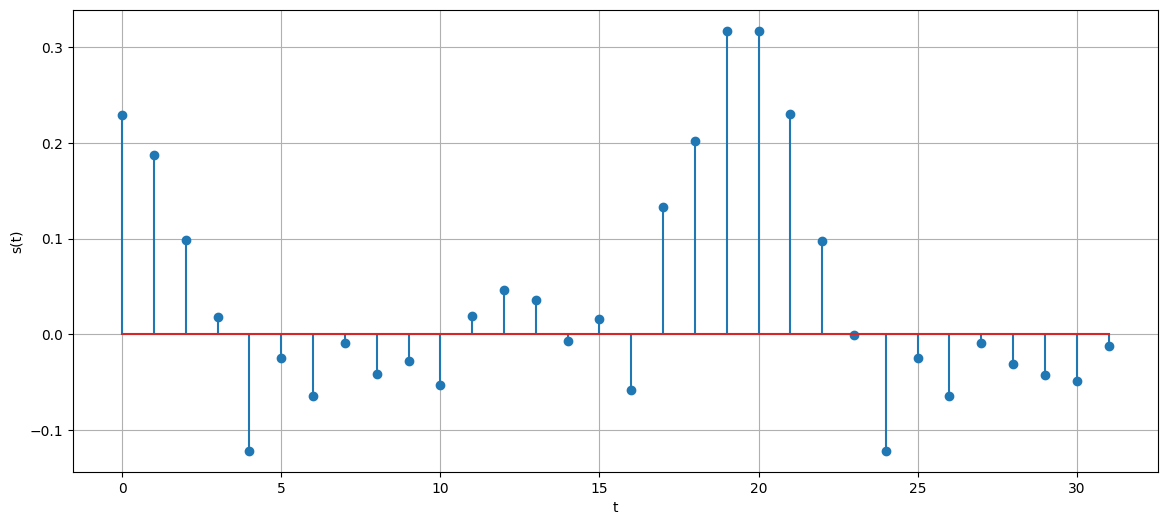

In [16]:
plt.figure(figsize=(14, 6))
plt.stem(signal_9)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала:

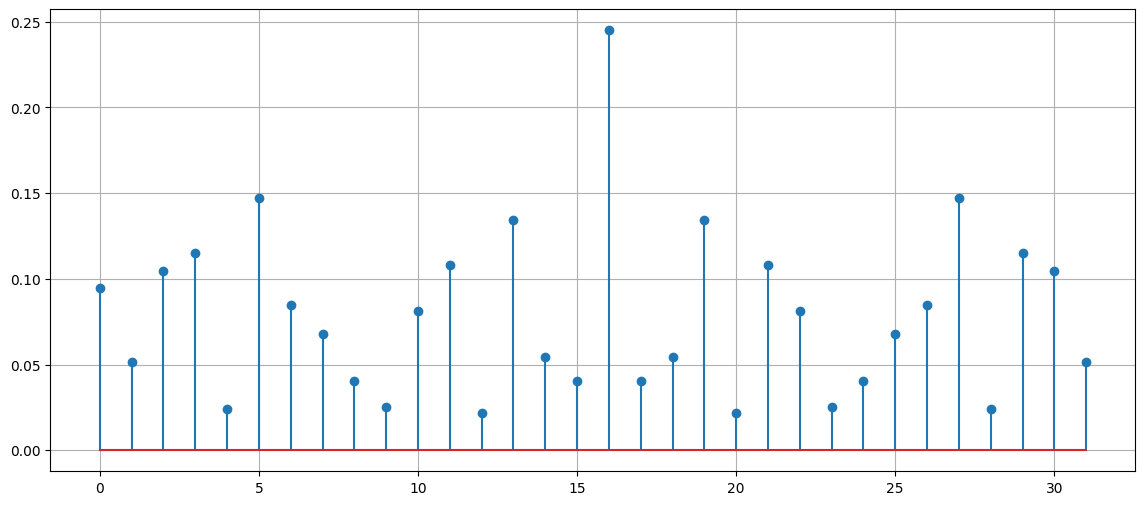

In [17]:
con_5 = 2 * np.abs(np.fft.fft(signal_5)) / len(np.fft.fft(signal_5))
con_9 = 2 * np.abs(np.fft.fft(signal_9)) / len(np.fft.fft(signal_9))

plt.figure(figsize=(14, 6))
plt.stem(f())
plt.grid(True)
plt.show()


Визуализация спектра дискретного сигнала после сглаживания полиномом второй степени по 5-и точкам:

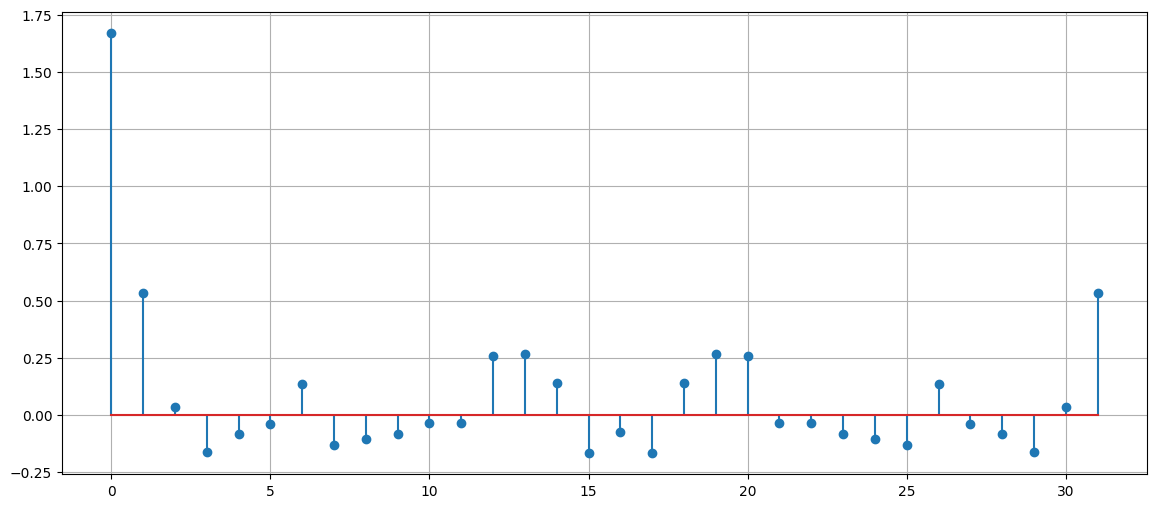

In [18]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_5))
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала после сглаживания полиномом второй степени по 9-и точкам:

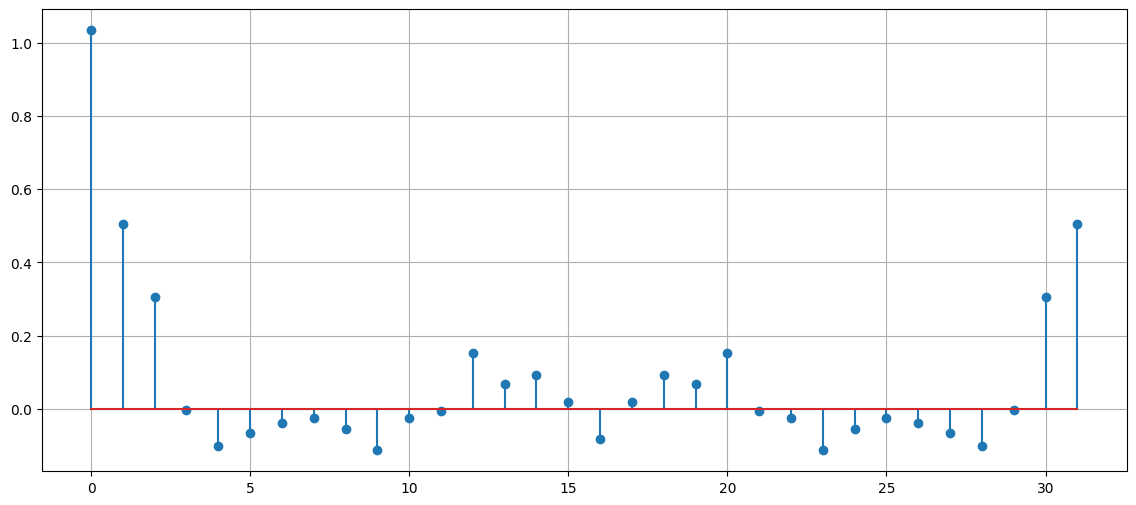

In [19]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_9))
plt.grid(True)
plt.show()

Вывод:

- Форма графиков спектра дискретного сигнала после применения сглаживания полиномом второй степени для 5 и 9 точек соответствует облику H(ω) при сглаживании с использованием соответствующего числа точек.

- Увеличение числа точек сглаживания приводит к более крутому спаду амплитуды на графике и уменьшению ширины полосы пропускания.

#### Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Сглаживание полиномом четвёртой степени по 7 узлам:

$y_7(n) = \frac1{231}(5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3})$

Формула для передаточной функции фильтра:

$H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$

Сглаживание полиномом четвёртой степени по 11 узлам:

$y_{11}(n) = \frac1{429} (13x_{k-5} - 45x_{k-4} - 10x_{k-3} + 60x_{k-2} + 120x_{k-1} + 143x_k + 120x_{k+1} + 60x_{k+2} - 10x_{k+3} - 45x_{k+4} - 13x_{k+5})$

Формула для передаточной функции фильтра:

$H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 26\cos{5\omega})$

In [20]:
def sgl(s):
    return np.convolve(s, np.array([5, -30, 75, 131, 75, -30, 5]) / 231, 'same')
def sgl_n(s):
    return np.convolve(s, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429, 'same')

Визуализация дискретного сигнала:

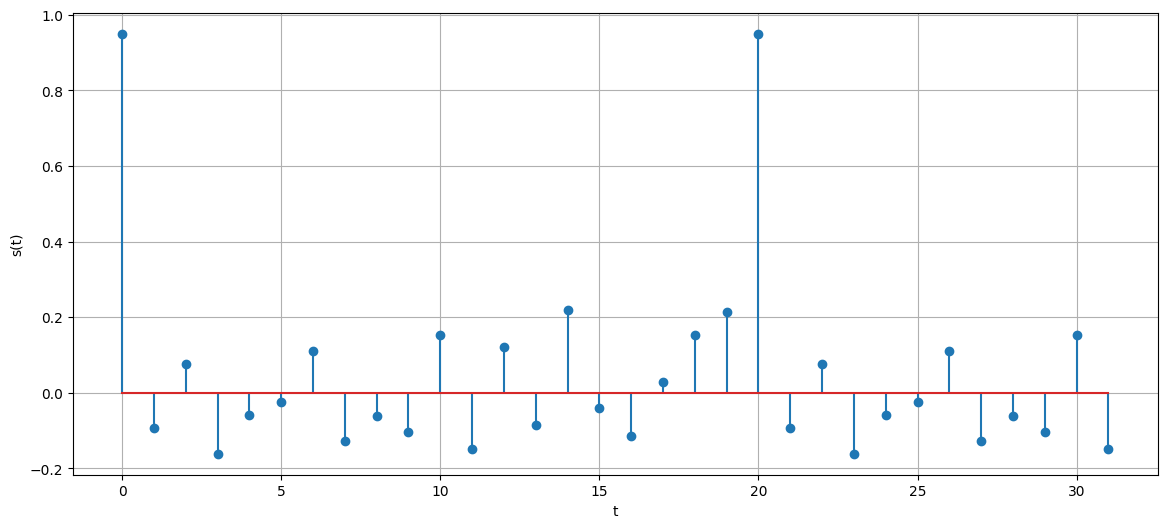

In [21]:
signal_7 = sgl(disc_sign())
signal_11 = sgl_n(disc_sign())

plt.figure(figsize=(14, 6))
plt.stem(n, disc_sign())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

Визуализация дискретного сигнала после сглаживания полиномом четвертой степени по 7-и точкам:

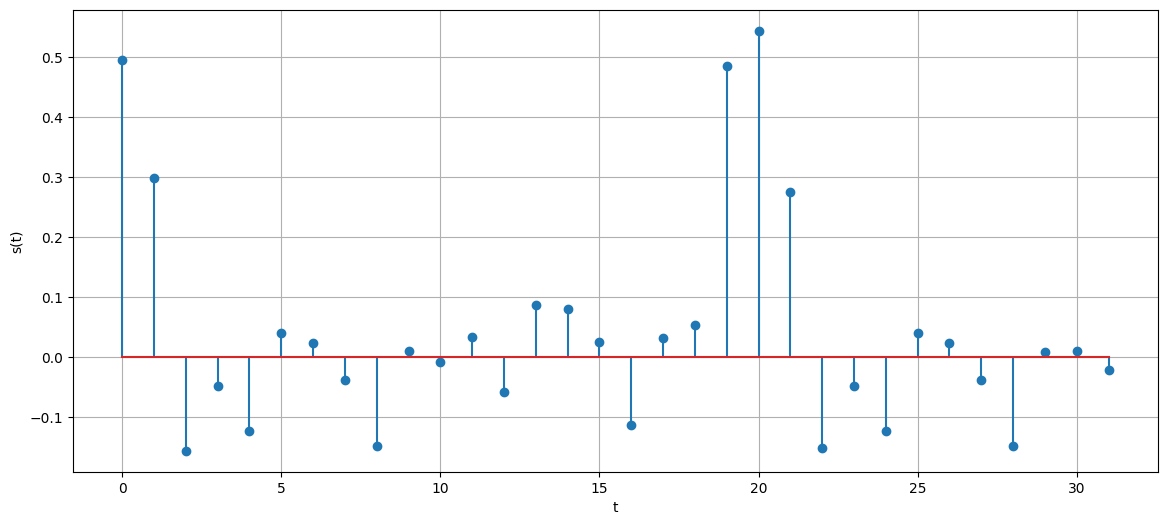

In [22]:
plt.figure(figsize=(14, 6))
plt.stem(signal_7)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()


Визуализация дискретного сигнала после сглаживания полиномом четвертой степени по 11-и точкам:

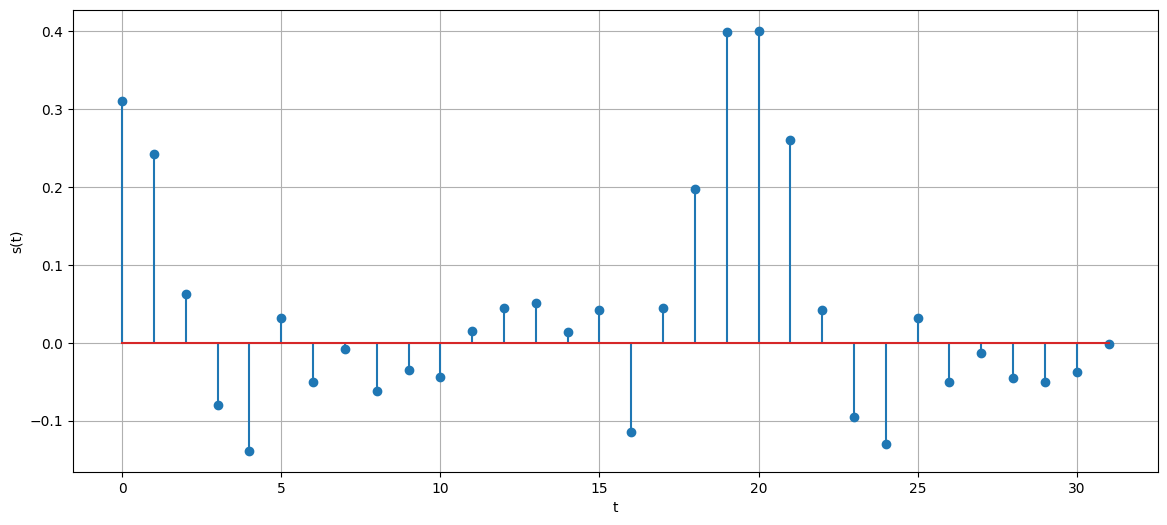

In [23]:
plt.figure(figsize=(14, 6))
plt.stem(signal_11)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

In [24]:
con_7 = 2 * np.abs(np.fft.fft(signal_7)) / len(np.fft.fft(signal_7))
con_11 = 2 * np.abs(np.fft.fft(signal_11)) / len(np.fft.fft(signal_11))

Визуализация спектра дискретного сигнала:

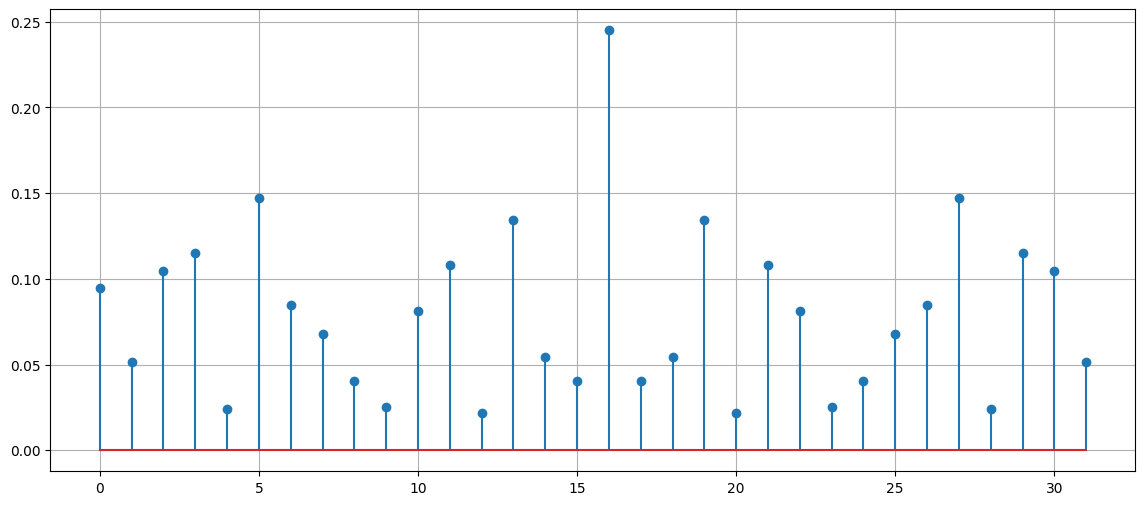

In [25]:
plt.figure(figsize=(14, 6))
plt.stem(f())
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала после сглаживания полиномом четвертой степени по 7-и точкам:

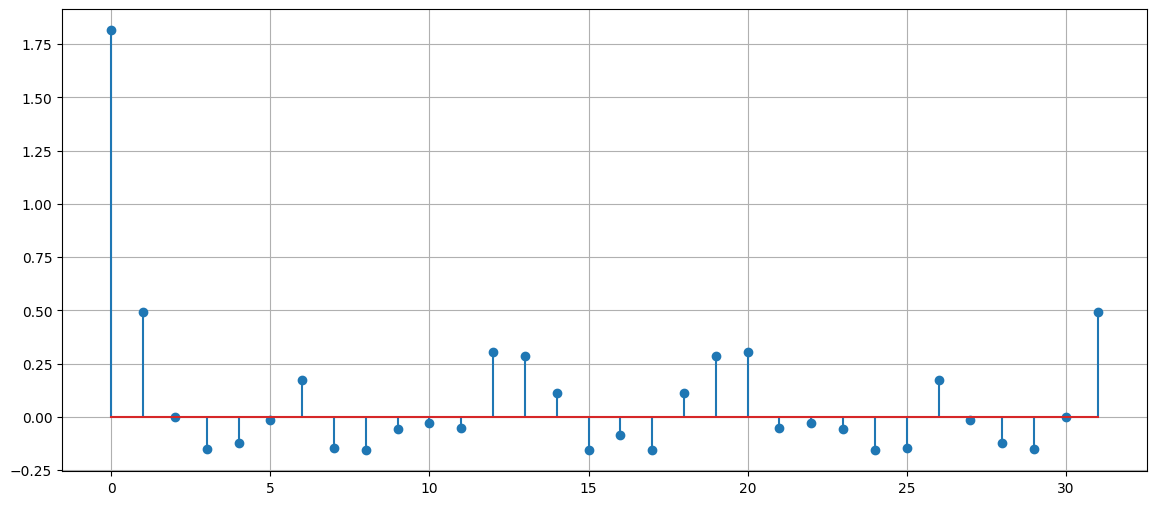

In [26]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_7))
plt.grid(True)
plt.show()

Визуализация спектра дискретного сигнала после сглаживания полиномом четвертой степени по 9-и точкам:

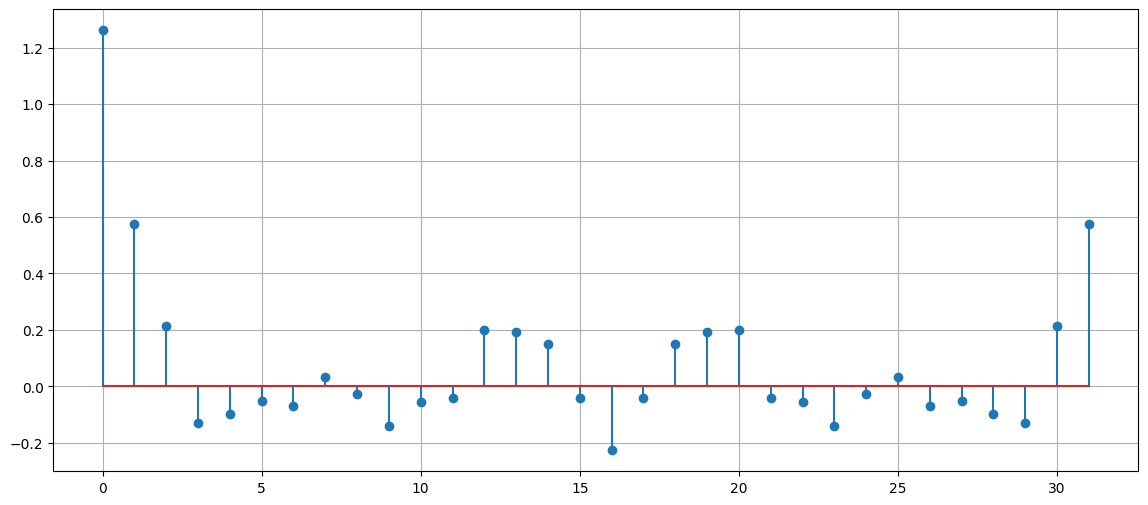

In [27]:
plt.figure(figsize=(14, 6))
plt.stem(np.fft.fft(con_11))
plt.grid(True)
plt.show()

Вывод: 
Из графиков видно, что изменения значений дискретных отсчетов спектра соответствуют значениям передаточных функций:

- С увеличением количества точек сглаживания уменьшается ширина полосы пропускания, а подавление высоких частот увеличивается.

- В области нулевой частоты наблюдается полоса пропускания из-за того, что сигнал является непостоянной величиной, и амплитудное падение не достигает нулевого значения.


- При увеличении степени полинома, используемого для сглаживания, наблюдается более быстрое уменьшение амплитуды в области нулевой частоты.

## Выводы

В ходе практической работы применялись полиномиальные фильтры для обработки дискретных последовательностей, с последующим анализом результатов через дискретное преобразование Фурье (ДПФ). Исследуемый дискретный сигнал формировался дискретизацией непрерывного сигнала, представленного линейной комбинацией гармонических функций. Были вычислены дискретные отсчеты спектра сигнала при помощи ДПФ, и их изменения анализировались в контексте передаточных функций фильтров. Сравнивались спектры модифицированных сигналов, полученных сглаживанием исходного сигнала линейной аппроксимацией и полиномами второй и четвертой степени при различном числе точек, выявляя аналогичные зависимости от степени сглаживания и числа точек.